# 1.3 Bivariate Analysis

- Evaluate **"association"** among variables
- Association is any relationship of variables that renders them statistically dependent


### 1.3.1 Categorical Variables

#### Contingency table

- In statistics, a contingency table is a type of table in a matrix format that displays the (multivariate) frequency distribution of the variables.

-  They provide a basic picture of the interrelation between two variables and can help find interactions between them. 


- variables can be categorical or discrete numerical with finite possible values

<img src="http://ihome.ust.hk/~imwan/index_files/pic/contingency.png">

In [1]:
#two numerical variables
import pandas as pd
xn = pd.Series([1,2,3,2,3,2,1,2,2,3])
yn = pd.Series([12,10,12,10,10,10,12,12,12,10])


In [2]:
Table=pd.crosstab(xn,yn)
print Table

col_0  10  12
row_0        
1       0   2
2       3   2
3       2   1


In [3]:
#one categorical, one numerical
xc=pd.Series(['female','female','male','male','male','male','female','male','male'])
yn=pd.Series([65,65,85,92,92,92,85,85,65])

In [4]:
Table=pd.crosstab(xc,yn)
print Table

col_0   65  85  92
row_0             
female   2   1   0
male     1   2   3


#### Chi Square 
Consider data

|Republican|	Democrat|	Totals
--|--|--|
M|	215|	143|	358
F	|19	|64	|83
Totals	|234|	207|	441



- If no association, what will table look like? We need a benchmark table that real table can compare with:

|Republican|	Democrat|	Totals
--|--|--|
M|	|	|	358
F	|   |	|83
Totals	| 234 |207	|	441

- first we fill the blanks row-wisely 

-  We have 358 males and 83 females, if there is no association, the percentage of male and female will be the same for republican, Democrat and totals

- The percentage of male is $\frac{358}{441}$, hence the number of male republican should be $234\times \frac{358}{441}$ if no association
- Then we have benchmark table as follows

|Republican|	Democrat|	Totals
--|--|--|
M|	189.95|168.04	|	358
F	|  44.04 |38.96	|83
Totals	| 234 |207	|	441

In [5]:
import numpy as np
male_perc=358.0/441
mr=234*male_perc
fr=234-mr
md=358-mr
fd=83-fr
print np.array([[mr,md],[fr,fd]])

[[ 189.95918367  168.04081633]
 [  44.04081633   38.95918367]]


- You may also find benchmark table column-wisely and will get the same table
- i.e. the republican percentage is $\frac{234}{441}$. Hence if no association, in both male and female, the percentage of repblican should be the same. 

- To compute **Chi-square**
    1. For each observed number in the real  table subtract the corresponding number in bechchmark table:  $(R — B)$.
    2. Square the difference $ (R —B)^2$.
    3. Divide the squares obtained by corresponding elements from benchmark table: $\frac{(R-B)^2}{B}$
    4. Sum  all $\frac{(R-B)^2}{B}$. This is the chi square statistic.

In [6]:
B=np.array([189.95,168.04,44.04,38.96])
R=np.array([215,143,19,64])
chi=sum((R-B)**2/B)
print chi

37.3653418446


Python also have built-in function:**chi2_contingency**

In [105]:
from scipy.stats import chi2_contingency
Real=np.array([[215,143],[19,64]])
chi= chi2_contingency(Real)
print type(Real),Real.shape
print chi

<type 'numpy.ndarray'> (2, 2)
(35.887768648068089, 2.090167442184169e-09, 1, array([[ 189.95918367,  168.04081633],
       [  44.04081633,   38.95918367]]))


**Application Scenarios:** For example, we want to compare whether sex gender or age has stronger association with Parties?

|Republican|	Democrat|	Totals
--|--|--|
under 50|	200|	100|	300
above 50	|34	|105	|141
Totals	|234|	207|	441

In [92]:
print chi2_contingency(np.array([[200,100],[34,105]]))[0]

66.2953822207


Compare association

|Lung|	Breast|	Liver|total
--|--|--|
Middle|	20|	40|	60|120
East	|134	|107	|241|482   
west|80|60|140|280
Totals	|234|	207	|441|882

|Lung|	Breast|	Liver|total
--|--|--|
above 50|	154|	147|	301|602
below 50|80|60|140|280
Totals	|234|	207	|441|882

In [95]:
#for location
import numpy as np
Location=np.array([[20,40,60],[134,107,241],[80,60,140]])
#print  chi2_contingency(Location)[0]
print "V=:", np.sqrt(chi2_contingency(np.array([[20,40,60],[134,107,241],[80,60,140]]))[0]/(882*2))


#for age
#print chi2_contingency(np.array([[154,147,301],[80,60,140]]))[0] 
print "V=:", np.sqrt(chi2_contingency(np.array([[154,147,301],[80,60,140]]))[0] /882*1)


V=: 0.0787395023528
V=: 0.0394407510032


Can we say age has stronger association with party categories than location?

Cramer's V ($V$): Standardized Chi-square($\chi^2$)
$$
V=\sqrt{\frac{\chi^2}{n\times min(r-1,c-1)}}
$$
- r: number of rows
- c:number of columns
- n: sample size

Cramer's V takes values between 0 and 1. 

**Practice: Feature Selection**
Among $x_1,x_2,x_3,x_4,x_5$, find the variable which is strongly associated with $y$, where 

In [78]:
[x1,x2,x3,x4,x5]=np.random.randint(2,size=(5,100))
print x5

[1 1 1 1 1 0 0 1 0 0 1 1 0 0 1 0 1 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0
 0 0 0 0 1 0 1 0 0 0 1 1 1 0 1 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0
 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 0 0 1 1 0 0 0 0 1 0 0]


In [80]:
y=3*x1+2*x2
print y

[0 2 3 0 0 3 2 0 3 0 5 2 5 0 3 0 2 5 0 0 2 0 2 0 0 3 5 5 5 3 3 5 3 2 2 0 2
 3 0 0 3 0 2 0 0 2 0 3 3 3 5 0 2 2 0 5 5 0 0 2 0 5 5 2 2 0 0 5 2 3 5 5 5 2
 2 2 0 0 5 0 2 5 2 0 0 5 2 5 3 2 0 2 5 3 5 5 5 2 2 5]


In [89]:
Table=pd.crosstab(x1,y)
Table2=pd.crosstab(x2,y)
print "association of x1 with y=",chi2_contingency(Table)[0]
print "association of x2 with y=",chi2_contingency(Table2)[0]
print "association of x3 with y=",chi2_contingency(pd.crosstab(x3,y))[0]
print "association of x4 with y=",chi2_contingency(pd.crosstab(x4,y))[0]
print "association of x5 with y=",chi2_contingency(pd.crosstab(x5,y))[0]

association of x1 with y= 100.0
association of x2 with y= 100.0
association of x3 with y= 0.77864479125
association of x4 with y= 4.13224841003
association of x5 with y= 2.49085785091


### 1.3.2 Numerical variables

#### Covariance 

$$Population:~Cov(X,Y)=\frac{\sum_{i=1}^N(X_i-\mu_X)(Y_i-\mu_Y)}{N}$$
 $$sample:~cov(X,Y)=\frac{\sum_{i=1}^n(x_i-\bar{x})(y_i-\bar{y})}{n-1}$$

In [52]:
url='http://ihome.ust.hk/~imwan/index_files/data/tips.csv'
df_tips=pd.DataFrame.from_csv(url)
df_tips.head()

,tip,sex,smoker,day,time,size
total_bill,,,,,,
16.99,1.01,Female,No,Sun,Dinner,2
10.34,1.66,Male,No,Sun,Dinner,3
21.01,3.50,Male,No,Sun,Dinner,3
23.68,3.31,Male,No,Sun,Dinner,2
24.59,3.61,Female,No,Sun,Dinner,4


In [98]:
cov_=np.cov(df_tips.index,df_tips["tip"],ddof=1) # output **CoVariance Matrix**
print cov_[0,1]
cov= cov_[1,0]

8.32350162922


#### Correlation Coefficient 

$$Population:~\rho (X,Y)=\frac{Cov(X,Y)}{\sigma_X,\sigma_Y}$$

 $$sample:~r(X,Y)=\frac{cov(x,y)}{s_xs_y}$$


In [99]:
np.corrcoef(df_tips.index,df_tips["tip"],ddof=1)

array([[ 1.        ,  0.67573411],
       [ 0.67573411,  1.        ]])

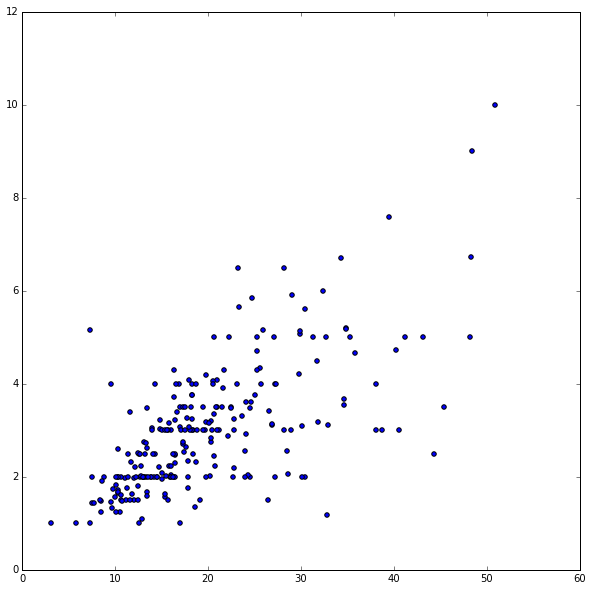

In [100]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.scatter(df_tips.index,df_tips["tip"])



#### Correctly Evaluate Correlation Coefficient

In [103]:
import matplotlib.pyplot as plt
%matplotlib inline
x=np.arange(0,100)
y=(x+10*np.random.randn(len(x)))**2-80*(x+10*np.random.randn(len(x)))
#y=x+np.random.randn(len(x))
print y


[  147.75609565   -56.03925237   496.86243858   730.392725    -495.46874223
 -1350.08083116   478.47483296   455.31147234  -262.32048661  -723.64493913
   247.29881666   286.3758316   -679.94970985   300.04951797  -344.98259768
 -1700.16318924 -1859.47383491 -1151.8404479  -1491.68415552 -1084.94883431
 -2775.40926893 -1271.70521864  -179.49971525   283.73406496    14.89934681
  -809.57105571 -1063.72753934  -944.68954538 -1419.30663286 -1303.15106132
 -2451.52156265 -1941.68372321 -1068.92106446 -1601.59063866 -1709.57472094
 -3048.03896234 -1074.14116199 -1275.06283004  -743.50009437    -8.35468734
 -2315.24951486 -1106.37514501 -1475.74653371  -134.97963256 -2581.58822922
 -4506.05482865 -1865.24919571 -1403.13275064 -2744.64626966 -1042.01039491
 -1299.27421292  -132.41855883  -438.32827802  -845.65463711  -788.60547062
 -3331.25436392 -3430.30305296  1308.47327744  -365.64934381 -2367.10682941
   445.49596145 -1172.19874478  -637.9999181  -1441.10293951   100.00746327
 -1173.81510

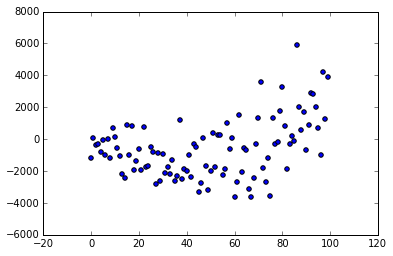

In [50]:
plt.scatter(x,y)

In [51]:
np.corrcoef(x,y,ddof=1)

array([[ 1.        ,  0.38027045],
       [ 0.38027045,  1.        ]])

**Remark:** When apply Pearson correlation in measuring the strength of association, please draw scatterplot first to find whether they have linear nor non linear pattern. Low correlation coefficient does not necessarily indicates weak association.
<img src="http://ihome.ust.hk/~imwan/index_files/pic/correlation.png">

### 1.3.3 Association vs. causality
[How Ice Cream Kills!](https://www.youtube.com/watch?v=VMUQSMFGBDo)
- 

-  [a spurious relationship, lurking variable (confounding factor)](https://en.wikipedia.org/wiki/Spurious_relationship)

To detect lurking variables and find causality, we  need to apply Bayesian network method, which will be covered in next topic. 